# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
btc = 1.2
eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
my_btc = requests.get(btc_url).json()

# Fetch current ETH price
my_eth = requests.get(eth_url).json()

# Compute current value of my crpto
# YOUR CODE HERE!

btc_sy =  my_btc["data"]["1"]["symbol"]
my_btc_price = my_btc["data"]["1"]["quotes"]["CAD"]["price"]

eth_sy =  my_eth["data"]["1027"]["symbol"]
my_eth_price = my_eth["data"]["1027"]["quotes"]["CAD"]["price"]

my_btc_value = btc * my_btc_price
my_eth_value = eth * my_eth_price


# Print current crypto wallet balance
print(f"The current value of your {btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $70843.98
The current value of your 5.3 ETH is $22176.41


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_API_KEY')

print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [8]:
# Format current date as ISO format
  
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()
print(today)

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    limit=1000,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio


2020-07-14T00:00:00-04:00


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-07-14 04:00:00+00:00,118.58,118.74,118.58,118.67,3986773,14581,118.667215,AGG
2020-07-14 04:00:00+00:00,313.25,319.76,312.00,318.92,93545660,580271,316.244144,SPY


In [9]:
# Pick AGG and SPY close prices

close_agg = df_portfolio[(df_portfolio['symbol']=='AGG')]
close_spy = df_portfolio[(df_portfolio['symbol']=='SPY')]

agg_close_price = close_agg['close'][0]
spy_close_price = close_spy['close'][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")


Current AGG closing price: $118.67
Current SPY closing price: $318.92


In [10]:
# Compute the current value of shares
my_spy_value = my_agg * agg_close_price
my_agg_value = my_spy * spy_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $23734.00
The current value of your 200 AGG shares is $15946.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
shares = my_spy_value + my_agg_value
crypto = my_btc_value + my_eth_value

# Create savings DataFrame
df_saving = {'crypto': crypto, 'shares': shares}
df_savings = pd.DataFrame.from_dict(df_saving, orient='Index', columns=['Amount'])

# Display savings DataFrame
display(df_savings)

,Amount
crypto,93020.387522
shares,39680.000000


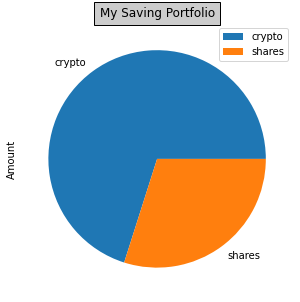

In [12]:
# Plot savings pie chart
df_savings.plot(kind='pie', y='Amount', figsize=(5,5))
plt.title("My Saving Portfolio", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto + shares
reach_goal = total_savings - emergency_fund

# Validate saving health
if total_savings > emergency_fund:
    display("Congratulations, you are doing great, keep it up")
elif total_savings == emergency_fund:
    display("Great job, you just reach your goal, lets go for more!!!")
elif total_savings < emergency_fund:
    display(f"Your current savings: {total_savings}, you need: {reach_goal} to reach your goal")

'Congratulations, you are doing great, keep it up'

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-03-25', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-03-25', tz='America/New_York').isoformat()

In [24]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)


df_stock_data = df_portfolio 

df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    #limit=1000,  #not using this because is not bringing all the data and when ploting MCS got a flat line
    start = start_date,
    end = end_date
).df

# Display sample data
#df_stock_data.head()

#ticker_data = pd.concat([ticker_data], axis=1, keys=["TSLA"])

df_stock_data.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-03-27 04:00:00+00:00,108.65,108.71,108.5345,108.62,1977292,11112,108.600681,AGG
2017-03-28 04:00:00+00:00,108.63,108.68,108.3500,108.37,2016097,9144,108.514754,AGG
2017-03-29 04:00:00+00:00,108.48,108.62,108.4600,108.61,1965626,10135,108.539517,AGG
2017-03-30 04:00:00+00:00,108.52,108.58,108.3800,108.41,1733874,8188,108.440472,AGG
2017-03-31 04:00:00+00:00,108.44,108.53,108.4200,108.49,3717721,13532,108.485913,AGG


In [25]:
#separete df thickers
AGG = df_stock_data[df_stock_data["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_stock_data[df_stock_data["symbol"]=="SPY"].drop("symbol", axis=1)


In [26]:
#concatenating thickers
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=["AGG","SPY"])
df_stock_data.head()

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2017-03-27 04:00:00+00:00  108.65  108.71  108.5345  108.62  1977292   
2017-03-28 04:00:00+00:00  108.63  108.68  108.3500  108.37  2016097   
2017-03-29 04:00:00+00:00  108.48  108.62  108.4600  108.61  1965626   
2017-03-30 04:00:00+00:00  108.52  108.58  108.3800  108.41  1733874   
2017-03-31 04:00:00+00:00  108.44  108.53  108.4200  108.49  3717721   

                                                      SPY                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2017-03-27 04:00:00+00:00       11112  108.600681  231.97  233.92  231.610   
2017-03-28 04:00:00+00:00        9144  108.514754  233.32  235.81  233.140   
2017-03-29 04:00:00+00:00       10135  108.539517  235.00  235.81  234.725   
2017-03-30 04:00:00+00:00        8188  108.440472  235.50  236.52  235.270   
2017-03-31 04:00:00+00:00       13532  108.485913  235.91  236.51  235.680   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2017-03-27 04:00:00+00:00  233.62  87454452      289784  233.041576  
2017-03-28 04:00:00+00:00  235.32  93483915      277352  234.596748  
2017-03-29 04:00:00+00:00  235.54  61950354      194177  235.429910  
2017-03-30 04:00:00+00:00  236.29  56737890      180049  236.126775  
2017-03-31 04:00:00+00:00  235.74  73733094      207326  236.011666

In [27]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500

MC_Sim = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [28]:
# Printing the simulation input data
print(MC_Sim)

In [29]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ESANCHEZ\API's\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997614,1.003281,0.999281,0.994579,1.007460,1.007281,1.009805,0.998992,0.990570,0.997194,...,1.005275,1.006992,0.995385,1.003702,0.998266,1.004670,1.006864,1.000429,1.007104,1.000971
2,0.998910,1.009594,0.986213,1.000955,1.008498,0.999987,1.011656,0.999614,0.999951,0.998595,...,0.995858,1.008366,0.997025,1.014958,1.003394,0.997728,1.015780,1.004818,1.009733,1.000680
3,1.008570,1.009958,0.980812,0.993267,1.005537,1.003778,1.016206,0.996918,1.008290,1.003396,...,1.000110,1.010078,0.995060,1.008503,1.003644,0.996876,1.012753,1.003798,1.004693,1.006345
4,1.014479,1.013733,0.985730,0.990662,1.004619,1.010170,1.000028,1.001918,1.011240,0.986107,...,0.997268,1.008206,0.996712,1.009282,1.001251,0.977660,1.022192,1.013197,0.994982,1.008360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.737485,5.066868,13.873825,7.138301,5.137929,8.519066,3.700678,8.721438,19.690250,6.645759,...,22.556263,7.551573,5.395731,8.855035,16.528255,5.810270,18.332405,3.753050,13.786158,6.150566
7557,7.739160,5.093683,13.962861,7.114175,5.060096,8.539351,3.682632,8.720519,19.800911,6.630114,...,22.652490,7.570842,5.400325,8.846925,16.649946,5.820507,18.440180,3.750773,13.975175,6.198897
7558,7.673542,5.101364,14.042186,7.162360,5.111765,8.583038,3.709689,8.860101,19.805385,6.658559,...,22.763888,7.600080,5.365403,8.898154,16.689183,5.799441,18.209940,3.773655,13.952670,6.246905
7559,7.676220,5.138451,13.994325,7.208213,5.130394,8.503586,3.727775,8.885342,19.740716,6.630962,...,22.812854,7.602981,5.364170,8.927079,16.514656,5.744623,18.027066,3.799574,14.100962,6.217293


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

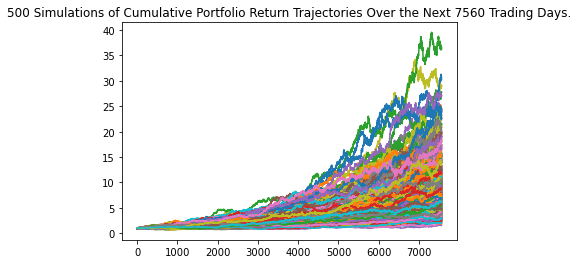

In [30]:
# Plot simulation outcomes
MC_Sim.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

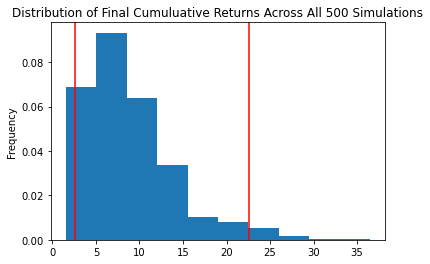

In [31]:
# Plot probability distribution and confidence intervals
MC_Sim.plot_distribution()

### Retirement Analysis

In [32]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_stat = MC_Sim.summarize_cumulative_return()

# Print summary statistics
print(mc_stat)

count           500.000000
mean              8.889938
std               5.145639
min               1.540717
25%               5.142584
50%               7.799312
75%              11.355664
max              36.497891
95% CI Lower      2.595354
95% CI Upper     22.627228
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [33]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(mc_stat[8]*initial_investment,2)
ci_upper = round(mc_stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $51907.07 and $452544.56


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [34]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(mc_stat[8]*initial_investment,2)
ci_upper = round(mc_stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $77860.61 and $678816.83


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [35]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_sims = 500

MC_Sim_5y = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*5
)

In [37]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_Sim_5y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ESANCHEZ\API's\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990872,1.007508,0.994143,0.999028,0.999707,1.018666,0.998678,1.004393,1.000868,1.011508,...,0.997939,1.000258,0.997632,1.004115,1.002049,0.995295,1.009019,1.006679,0.995775,0.997261
2,0.995886,1.011937,0.994625,1.010173,1.000787,1.027445,1.003011,1.002666,0.996300,1.019993,...,0.990041,0.991354,0.998318,0.989694,0.997428,0.987791,1.013923,0.997499,0.975377,0.992168
3,0.995375,1.003207,0.994987,1.007171,1.003766,1.030019,0.999790,0.999739,0.989951,1.020878,...,0.995861,0.986017,0.997332,0.995626,0.993467,0.991679,1.006972,1.002567,0.970484,0.991448
4,0.994324,1.011824,0.996608,1.014624,0.996128,1.031202,1.004290,1.004713,0.990682,1.035465,...,1.015832,0.973751,0.996537,0.988856,0.993841,0.984634,1.005814,1.003397,0.976926,0.989992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.723377,1.084812,1.199137,1.234770,1.129557,1.405940,1.531796,1.672491,0.871996,1.675527,...,1.210137,1.730986,1.126548,1.282628,1.171295,1.085052,1.290920,1.380644,1.149417,2.139051
1257,1.709760,1.076704,1.197498,1.230246,1.130299,1.397319,1.519948,1.668403,0.878928,1.696719,...,1.213334,1.752189,1.124240,1.279538,1.174530,1.070800,1.288261,1.368122,1.156509,2.147361
1258,1.695641,1.070082,1.203122,1.239412,1.129295,1.403211,1.524216,1.667436,0.889265,1.690239,...,1.215326,1.764633,1.127951,1.283471,1.154921,1.067132,1.293103,1.379184,1.165531,2.158353
1259,1.701493,1.072518,1.211428,1.245483,1.132514,1.395231,1.520141,1.651833,0.897991,1.693598,...,1.211946,1.758173,1.123000,1.275899,1.143591,1.067175,1.287274,1.383900,1.178075,2.176892


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

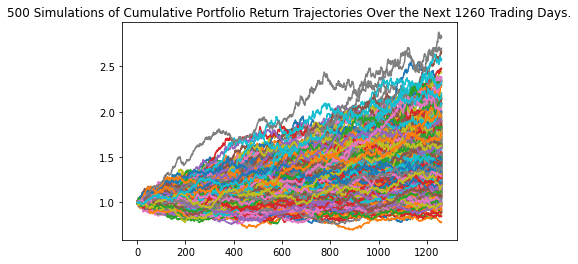

In [40]:
# Plot simulation outcomes
MC_Sim_5y.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

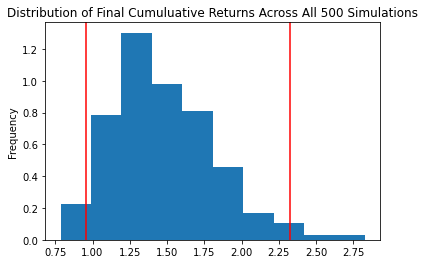

In [41]:
# Plot probability distribution and confidence intervals
MC_Sim_5y.plot_distribution()

In [43]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
mc_stat_5y = MC_Sim.summarize_cumulative_return()
print(mc_stat_5y)

count           500.000000
mean              8.889938
std               5.145639
min               1.540717
25%               5.142584
50%               7.799312
75%              11.355664
max              36.497891
95% CI Lower      2.595354
95% CI Upper     22.627228
Name: 7560, dtype: float64


In [46]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(mc_stat_5y[8]*initial_investment,2)
ci_upper_five = round(mc_stat_5y[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $155721.22 and $1357633.67


### Ten Years Retirement Option

In [47]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_sims = 500

MC_Sim_10y = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*10
)

In [48]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_Sim_10y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ESANCHEZ\API's\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.013465,0.986570,0.997831,0.992815,0.999091,0.999107,1.015126,0.998923,1.001397,1.002566,...,0.993453,1.001553,1.004138,1.004891,0.991689,1.010209,1.007379,1.004186,1.001885,0.996403
2,1.005493,0.987404,0.994252,0.991617,0.998301,1.000148,1.010360,0.986579,1.002696,0.990811,...,0.990700,0.997486,0.996943,1.013713,0.995216,1.019231,1.012578,1.005767,0.996106,0.993671
3,1.008883,0.986057,0.990976,0.985305,1.006876,0.998340,1.012984,0.982263,1.000816,0.975754,...,0.994949,1.003188,0.990222,1.016009,1.002511,1.015255,1.018045,1.008290,0.996072,0.990191
4,1.011214,0.988008,0.981545,0.990853,1.013363,0.982652,1.010863,0.991159,0.999951,0.974671,...,0.993374,1.008710,0.993228,1.022857,1.009451,1.015008,1.027349,1.007031,1.001922,0.983985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.805170,1.534034,2.104322,5.939382,1.402896,1.462701,2.935313,2.764486,2.249516,1.142975,...,1.070281,0.999499,2.638044,3.223071,2.378956,2.832045,1.973909,2.187305,3.292809,1.987600
2517,1.807171,1.533834,2.114487,5.892221,1.400091,1.475200,2.932631,2.757187,2.275381,1.140397,...,1.074127,1.006998,2.636308,3.226886,2.368835,2.802709,1.978329,2.177864,3.271934,1.978307
2518,1.795450,1.543965,2.138420,5.894574,1.401243,1.477064,2.951447,2.765931,2.295375,1.147847,...,1.073537,1.019782,2.627959,3.219787,2.343158,2.772539,1.952170,2.173766,3.248099,1.968760
2519,1.788323,1.552920,2.142014,5.871663,1.403422,1.465062,2.951176,2.751359,2.333330,1.143893,...,1.080054,1.026398,2.609072,3.241521,2.338839,2.765318,1.949626,2.187760,3.249244,1.952449


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

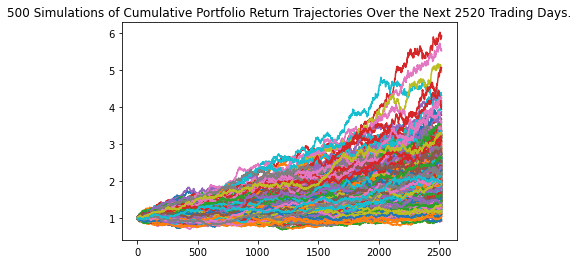

In [49]:
# Plot simulation outcomes
MC_Sim_10y.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

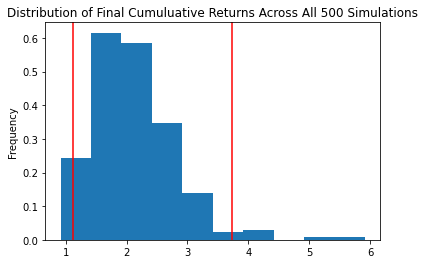

In [50]:
# Plot probability distribution and confidence intervals
MC_Sim_10y.plot_distribution()

In [52]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_stat_10y = MC_Sim.summarize_cumulative_return()

# Print summary statistics

print(mc_stat_5y)

count           500.000000
mean              8.889938
std               5.145639
min               1.540717
25%               5.142584
50%               7.799312
75%              11.355664
max              36.497891
95% CI Lower      2.595354
95% CI Upper     22.627228
Name: 7560, dtype: float64


In [53]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(mc_stat_10y[8]*initial_investment,2)
ci_upper_ten = round(mc_stat_10y[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $155721.22 and $1357633.67
